# Project 3- Predicting if a person likes a song

By Preethi Susan Abraham and Alvin Varghese

### Data Description 

The dataset is obtained from Kaggle(https://www.kaggle.com/geomack/spotifyclassification). In this dataset, we are trying to predict if a person likes a song based on the song's features like acousticness, dancebility etc. Here, the person has already classified if he/she likes a song or not.  

The features in the dataset are:
1. acousticness
2. danceability
3. durationms
4. energy
5. instrumentalness
6. key
7. liveness
8. loudness
9. mode
10. speechiness
11. tempo
12. timesignature
13. valence.

The target in this dataset is the 'target' column. 1 means that the person likes this song and 0 means that this person does not like the song.

The main aim of this dataset is to predict if this particular person will like a song based on their previous song preferences.

This type of analysis can be used by music streaming services in order to help them to understand each customer's preferences in their taste of music and accordingly curate playlists which will make users spend more time on these apps 

### Description of the features:

1. **acousticness**: A measure from 0.0 to 1.0 of whether the track is acoustic.
2. **danceability**: A value of 0.0 is least danceable and 1.0 is most danceable.
3. **durationms**: Duration of the track in milliseconds
4. **energy**: Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.Typically, energetic tracks feel fast, loud, and noisy.
5. **instrumentalness**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
6. **key**: The key the track is in. 0=C, 1=C#/Db, 2:D and so on
7. **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.A track of 0.8 or above is highly lively
8. **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
9. **mode**: Represents the modality of the track. 1=Major and 0=Minor
10. **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value
11. **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
12. **timesignature**: Overall time signature of the track
13. **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


#### Source: https://opendatascience.com/a-machine-learning-deep-dive-into-my-spotify-data/

In [1]:
#Loading the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the data
data=pd.read_csv("C:/Users/Preethi Abraham/Desktop/Brandeis Studies/Big Data 2/datasets/notebooks/Assignment 4/classifysongs.csv")

In [3]:
#Viewing the first few rows of the dataset
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Cleaning the data

In [4]:
#Removing the first column as it is 
data.drop("Unnamed: 0", axis=1, inplace=True)

# Exploratory Data Analysis

In [5]:
#To get the summarry statistics of each column in our dataset
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
#Setting the theme style of the plots
sns.set_style("darkgrid")

In [7]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
#Since our main data has categorical values, we are just trying to extract the columns with numeric data as we will mainly be working with these columns
numeric_data=data.iloc[:,0:14]

In [9]:
#Viewing the numeric dataframe
numeric_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


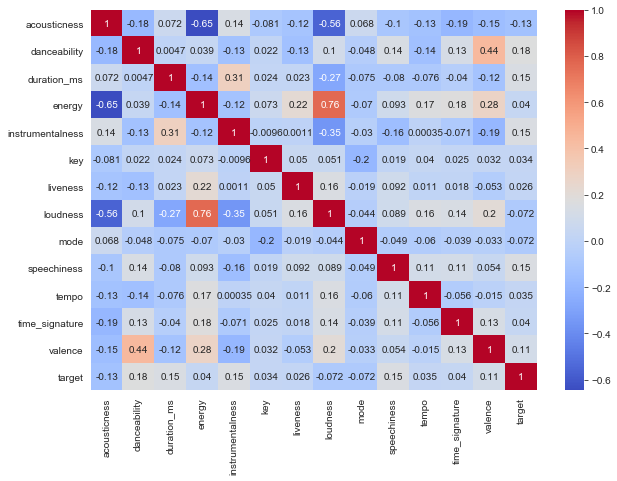

In [10]:
#Heatmap
plt.figure(figsize = (10,7))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)

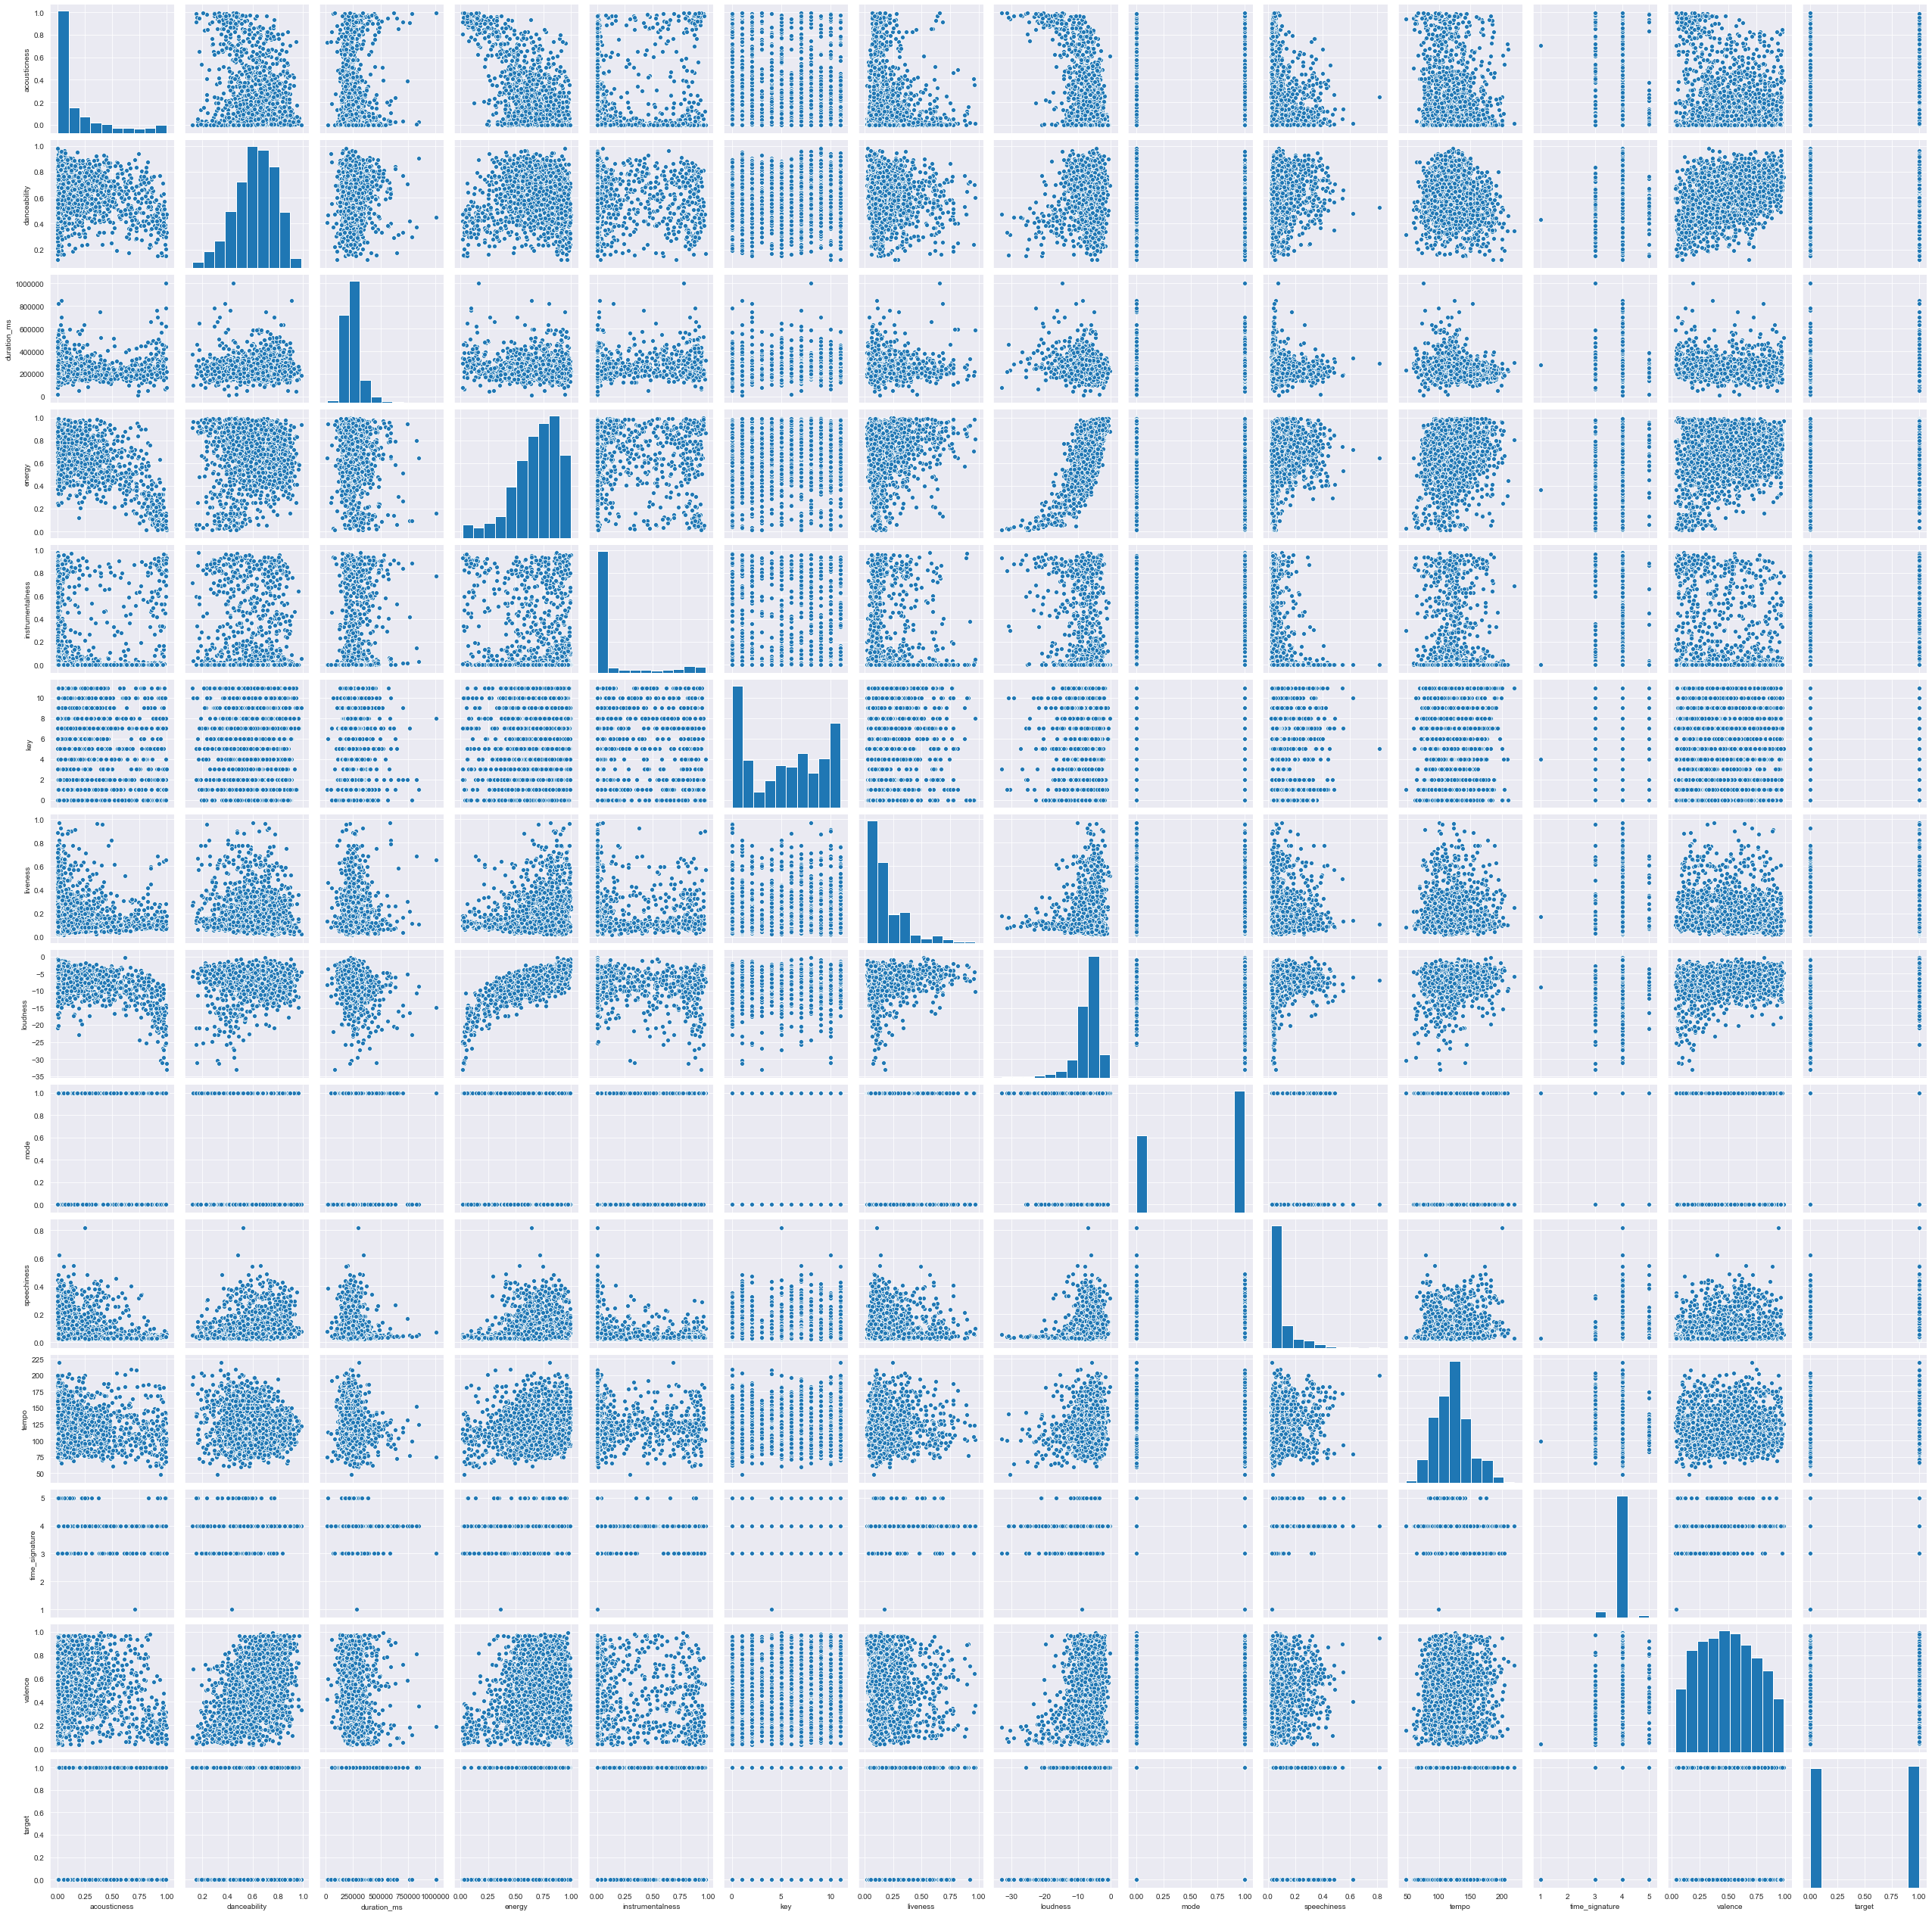

In [11]:
sns.pairplot(numeric_data)

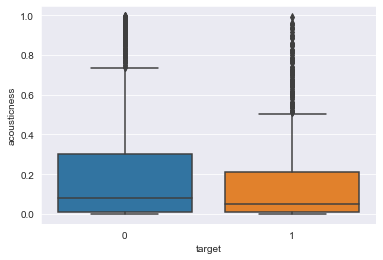

In [12]:
sns.boxplot(data=data, x='target', y='acousticness')
#When the 'acousticness' score is lower (median of approx 0.1), the person seems to like the song more.

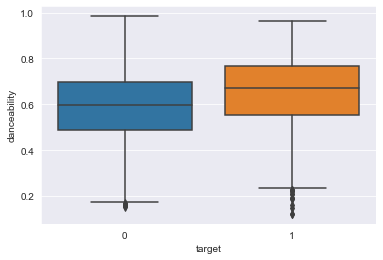

In [13]:
sns.boxplot(data=data, x='target', y='danceability')
#When the 'danceability' score is higher (median of approx 0.7), the person seems to like the song more.

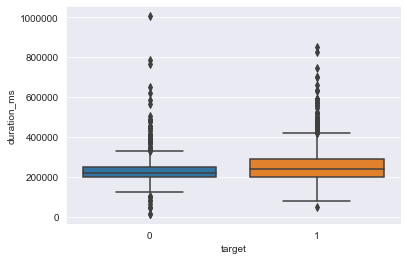

In [14]:
sns.boxplot(data=data, x='target', y='duration_ms')
#When the 'duration_ms' score is higher (median of approx 300000), the person seems to like the song more.

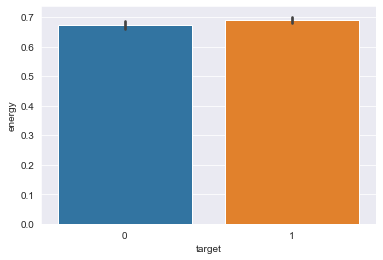

In [15]:
sns.barplot(data=data, x='target', y='energy')
#Energy score does not seem to have too much impact towards the person liking a song

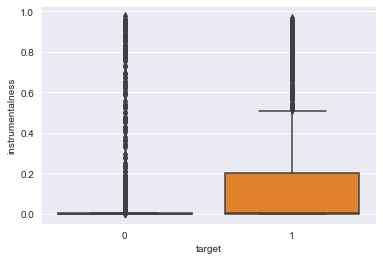

In [16]:
sns.boxplot(data=data, x='target', y='instrumentalness')
#When the 'instrumentalness' score is high (approx between 0.1 and 0.2), the person seems to like the song

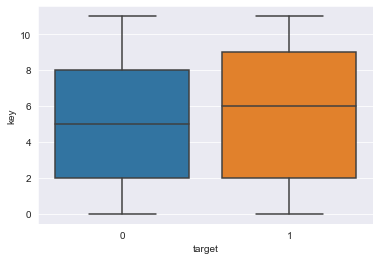

In [17]:
sns.boxplot(data=data, x='target', y='key')
#Songs which have a key of 6 or greater seem to be liked by this person

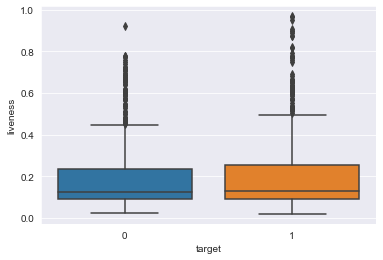

In [18]:
sns.boxplot(data=data, x='target', y='liveness')
#Liveness score does not seem to be impacting the person's dislike or like towards a particular song

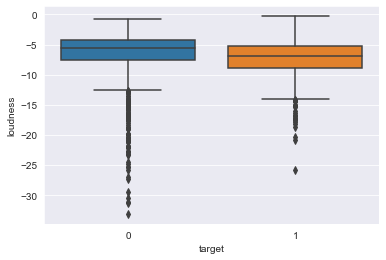

In [19]:
sns.boxplot(data=data, x='target', y='loudness')
#Loudness score does not seem to be impacting the person's dislike or like towards a particular song. 

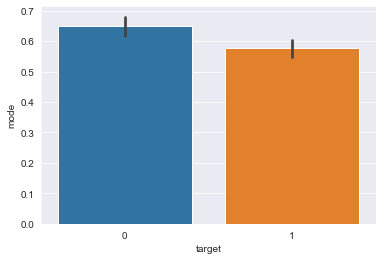

In [20]:
sns.barplot(data=data, x='target', y='mode')
# Slightly lower mode score(approx 0.55) seem to be impacting the person's dislike or like towards a particular song.

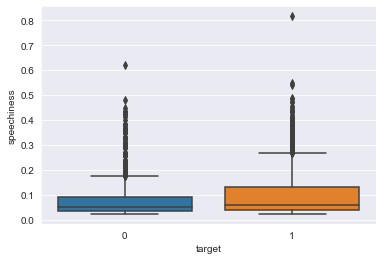

In [21]:
sns.boxplot(data=data, x='target', y='speechiness') 
#The person seems to like a song which has speechiness score of approx 0.1 of higher

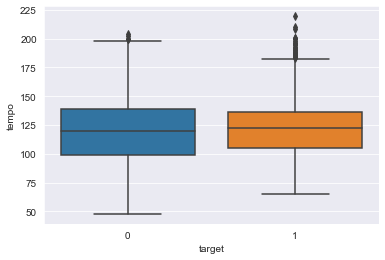

In [22]:
sns.boxplot(data=data, x='target', y='tempo') 
#Tempo score does not seem to be impacting the person's dislike or like towards a particular song.

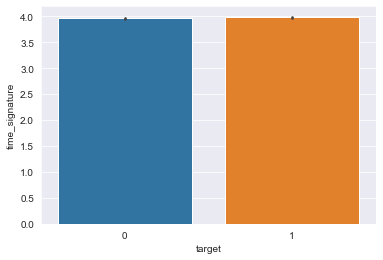

In [23]:
sns.barplot(data=data, x='target', y='time_signature') 
#Time signature score does not seem to be impacting the person's dislike or like towards a particular song.

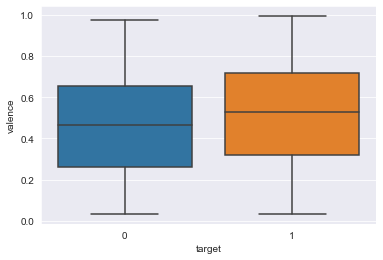

In [24]:
sns.boxplot(data=data, x='target', y='valence')
#The person seems to like a song which has valence score of approx 0.5 of higher

# Data Reduction Technique : Principal Component Analysis

In [25]:
x=numeric_data.iloc[:, 0:13]
y=numeric_data['target']

In [26]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [27]:
features = ["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]
x=pd.DataFrame(data = x, columns = features)
x.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.916446,-0.166291,-0.454530,0.795738,3.763084,1.066709,0.124048,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-1.190619,-0.346454,-0.881573,0.795738,-0.147529,1.442323,0.124048,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.916446,-0.204897,-0.016586,0.795738,2.183712,-1.745166,0.124048,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.093928,-0.634715,-2.167220,0.795738,-0.740350,-1.316964,0.124048,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.093928,1.596735,-1.213155,-1.256696,-0.258753,1.964120,0.124048,1.647627


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [29]:
principalComponents = pca.fit_transform(x)

In [30]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

In [31]:
principalDf.head(5)

,Principal Component 1,Principal Component 2
0,-0.281205,-0.937441
1,1.081929,-0.946625
2,0.218224,-1.563763
3,3.652614,-0.378661
4,0.614858,0.466853


In [32]:
finalDf = pd.concat([principalDf, numeric_data['target']], axis = 1)
finalDf.head(5)

,Principal Component 1,Principal Component 2,target
0,-0.281205,-0.937441,1
1,1.081929,-0.946625,1
2,0.218224,-1.563763,1
3,3.652614,-0.378661,1
4,0.614858,0.466853,1


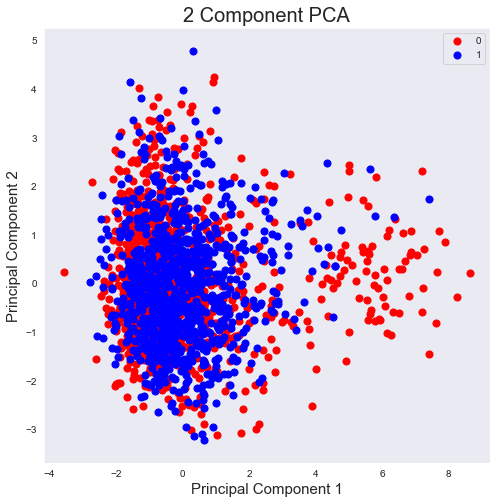

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Model for classification

##### 1. K Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
numeric_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [37]:
#Spitting the data into x(independent variables) and y(dependent variables)
x=numeric_data.iloc[:, 0:13]
y=numeric_data['target']

In [38]:
x.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [39]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [40]:
features = ['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence' ]
x=pd.DataFrame(data = x, columns = features)
x.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.916446,-0.166291,-0.454530,0.795738,3.763084,1.066709,0.124048,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-1.190619,-0.346454,-0.881573,0.795738,-0.147529,1.442323,0.124048,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.916446,-0.204897,-0.016586,0.795738,2.183712,-1.745166,0.124048,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.093928,-0.634715,-2.167220,0.795738,-0.740350,-1.316964,0.124048,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.093928,1.596735,-1.213155,-1.256696,-0.258753,1.964120,0.124048,1.647627


In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)#60% training and 40% testing

In [42]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Training Score =",knn.score(X_train,y_train))
print("Testing Score =",knn.score(X_test,y_test)) 
print("\n")
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report\n")
print("Accuracy Score for 10 neighbors= ",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print("\n*********************************************************")

Training Score = 0.7504132231404959
Testing Score = 0.6864931846344485


Confusion Matrix:

[[342  66]
 [187 212]]

 Classification Report

Accuracy Score for 10 neighbors=  0.6864931846344485
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       408
           1       0.76      0.53      0.63       399

    accuracy                           0.69       807
   macro avg       0.70      0.68      0.68       807
weighted avg       0.70      0.69      0.68       807


*********************************************************


##### 2. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba.metric import AIC_score

In [44]:
lr = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print('intercept ', lr.intercept_[0])
print("\n")
print(pd.DataFrame({'coefficient': lr.coef_[0]}, index=x.columns).transpose())
print()

intercept  0.06922317827833399


             acousticness  danceability  duration_ms   energy  \
coefficient     -0.452837      0.320521     0.198287 -0.14385   

             instrumentalness       key  liveness  loudness      mode  \
coefficient          0.394108  0.023999  0.131725 -0.272467 -0.064187   

             speechiness     tempo  time_signature   valence  
coefficient     0.292854  0.156446        0.037963  0.198536  



In [46]:
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)
lr_result = pd.DataFrame({'actual': y_test, 
                             'p(0)': [p[0] for p in lr_proba],
                             'p(1)': [p[1] for p in lr_proba],
                             'predicted': lr_pred })

In [47]:
lr_result.head()

,actual,p(0),p(1),predicted
1053,0,0.668300,0.331700,0
1670,0,0.452787,0.547213,1
1535,0,0.164043,0.835957,1
1554,0,0.442047,0.557953,1
1171,0,0.555350,0.444650,0


In [48]:
from dmba import classificationSummary, gainsChart, liftChart
print("Classification report for Training Data:\n")
classificationSummary(y_train, lr.predict(X_train))
print("\n********************************************")
print("\nClassification report for Test Data:\n")
classificationSummary(y_test, lr.predict(X_test))
print("\n********************************************\n")
print("Accuracy Score for Logistic Regression= ", accuracy_score(y_test,lr_pred))

Classification report for Training Data:

Confusion Matrix (Accuracy 0.6603)

       Prediction
Actual   0   1
     0 391 198
     1 213 408

********************************************

Classification report for Test Data:

Confusion Matrix (Accuracy 0.6654)

       Prediction
Actual   0   1
     0 275 133
     1 137 262

********************************************

Accuracy Score for Logistic Regression=  0.6654275092936803


In both K Nearest Neighbors and Logistic Regression, we have performed cross validation. Here, we used 60% of our data for training and 40% for testing. This was mainly done to avoid overfitting the data. Overfitting the model could lead to a great training score, but it will fail to make good predictions out of unseen data since this model would be unable to learn the trends from the training data.

The accuracy for both models is around 0.66 which means that we haven't overfitted the model.

# Using unseen data to make predictions

### Insights from the Exploratory Data Analysis:

The person likes a song when:
1. 'acousticness' score is lower than 0.1 (median of approx 0.1)
2. 'danceability' score is higher (median of approx 0.7)
3. 'duration_ms' score is higher (median of approx 300000)
4. 'instrumentalness' score is high (approx between 0.1 and 0.2)
5. Songs which have a key of 6 or greater
6. Song has slightly lower mode score(approx 0.55)
7. Songs have speechiness score of approx 0.1 of higher
8. Songs valence score of approx 0.5 of higher

Features which do not seem to have too much impact towards the person liking a song:
1. Energy score 
2. Liveness score 
3. Loudness score 
4. Tempo score 
5. Time signature score 

In [49]:
numeric_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [50]:
#Creating our own data from our intuition

values_to_predict= np.array([
                            [0.08, 0.85,400000, 0.5, 0.15, 7, 0.15,-6,0.5, 0.17, 126, 4, 0.7  ],    # Case 1: Surely will like the song
                            [0.3, 0.43,200000, 0.3, 0.02, 3, 0.1, -4, 0.6,0.005,102, 4, 0.25],     #Case 2: Surely will not like the song
                        ])

print(values_to_predict, '\n\n')

[[ 8.00e-02  8.50e-01  4.00e+05  5.00e-01  1.50e-01  7.00e+00  1.50e-01
  -6.00e+00  5.00e-01  1.70e-01  1.26e+02  4.00e+00  7.00e-01]
 [ 3.00e-01  4.30e-01  2.00e+05  3.00e-01  2.00e-02  3.00e+00  1.00e-01
  -4.00e+00  6.00e-01  5.00e-03  1.02e+02  4.00e+00  2.50e-01]] 




In [51]:
#Scaling the unseen data
values_to_predict = StandardScaler().fit_transform(values_to_predict)
values_to_predict

array([[-1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  0.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  0., -1.]])

In [52]:
print("For Logistic Regression\n")
print(lr.predict(values_to_predict))

print("\n********************************************\n")

print("For KNN\n")
print(knn.predict(values_to_predict))


#The result is accurate for Logistic Regression and KNN!
# For the first case, we were accurately able to predict that the person will like a song with case 1's features
#For the second case, we were accurately able to predict that the person will not like a song with case 2's features

For Logistic Regression

[1 0]

********************************************

For KNN

[1 0]
